# Assignment: Scale-free networks

## 1. Implement BA algorithm
For this assignment you will be implementing the BA algorithm from the reading (see [Barabasi Ch 5.3](http://barabasi.com/networksciencebook/)). Create a function that takes `n` the number of nodes for the graph, and `m_o` the initial number of nodes, as arguments and returns a networkx graph with a scale-free degree distribution.

(Hint1: `numpy`'s [`np.random.choice`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) has optional arguments for weighted random selection)

(Hint2: there is another very simple method to sample nodes based on their degree. In doing so, you'll create a long list.)

In [126]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [127]:
def BA_scale_free(n, m_o, m=2):
    #create a random graph with size n
    prob = np.random.random_sample()
    graph = nx.erdos_renyi_graph(n=m_o, p=prob)
    
    #if any node has degree 0, randomly connect it with another node or itself
    for node in graph.nodes():
        if (graph.degree(node) == 0):
            graph.add_edge(node, np.random.randint(0,m_o - 1))
    #get the degree list        
    degree = [graph.degree(i) for i in graph.nodes()]
    
    for i in range(m_o, n):
        size = graph.number_of_nodes()
        choice = np.random.choice(size, m, p= degree / np.sum(degree))
        graph.add_node(size)
        for j in choice:
            graph.add_edge(size, j)
        degree = [graph.degree(i) for i in graph.nodes()]
    return graph

In [128]:
test= BA_scale_free(50,5,m=2)
print(nx.info(test))

Name: gnp_random_graph(5,0.38652407449093096)
Type: Graph
Number of nodes: 50
Number of edges: 90
Average degree:   3.6000


## 2. BA graph analysis
Test your algorithm by creating a graph with `N = 1200` and `m_o = 7`. Calculate (and print) the average shortest path length of the graph:

In [129]:
def all_shortest_path_lengths(G):
    p=nx.shortest_path(G)
    return [len(p[i][j]) -1 for i in G.nodes() for j in G.nodes() if i < j if i in p if j in p[i]]

In [130]:
N = 1200
m_o = 7
test_graph = BA_scale_free(N,m_o)
print("the average shortest path length of the graph is ", np.mean(all_shortest_path_lengths(test_graph)))

the average shortest path length of the graph is  4.13081873784


Calculate (and print) the average clustering coefficient of the graph:

In [131]:
cc = [nx.clustering(test_graph,i) for i in test_graph.nodes()]
print("the average clustering coefficient of the graph is ", np.mean(cc))

the average clustering coefficient of the graph is  0.0221159635709


Now plot a histogram of the degree distribution of the graph (remember to include `%matplotlib inline` for plotting in Jupyter):

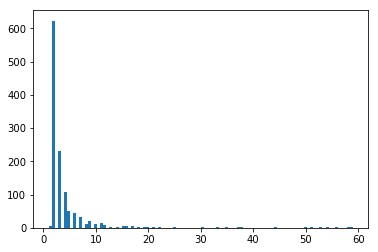

In [132]:
%matplotlib inline
degree = [test_graph.degree(i) for i in test_graph.nodes()]
pdf, bins, patch = plt.hist(degree, bins=100)

## 3. BA and ER comparison
Now lets compare the scale-free and random graphs. Create a random graph with the same number of nodes and about the same number of edges, then calculate the average shortest path length of that graph:

In [133]:
# Create a random graph with the same number of nodes and about the same number of edges
edgeNumber = test_graph.size()
p = 2 * edgeNumber / (N * (N-1))
random_graph = nx.erdos_renyi_graph(N, p=p)
print(nx.info(random_graph))

Name: gnp_random_graph(1200,0.0033291631915485127)
Type: Graph
Number of nodes: 1200
Number of edges: 2344
Average degree:   3.9067


In [134]:
print("the average shortest path length of the graph is ", np.mean(all_shortest_path_lengths(random_graph)))

the average shortest path length of the graph is  5.32117029956


Calculate (and print) the average clustering coefficient of the graph:

In [135]:
cc = [nx.clustering(random_graph,i) for i in random_graph.nodes()]
print("the average clustering coefficient of the graph is ", np.mean(cc))

the average clustering coefficient of the graph is  0.0062380952381


Now plot a histogram of the degree distribution of the random graph:

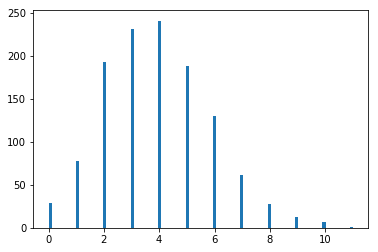

In [140]:
degree = [random_graph.degree(i) for i in random_graph.nodes()]
pdf, bins, patch = plt.hist(degree, bins=100)

How do the average shortest path lengths, average clustering coefficients, and degree distributions between the graphs compare?

## Comparison

Compare to the random graph with same number of nodes and edges, the scale-free graph has shorter average shortest path length, much higher clustering coefficients. For the degree distribution, the random graph has a bell shape which we know follows the possion distribution however, the scale free graph has a downward sloping density curve, which we know follows a power-law distribution.

## 4. Preferential attachment without using the degree

As explained in a video, it is possible to achieve the linear preferential attachment without calculating the degree by using the principle that we learned in the friendship paradox. Implement this version and see whether you can get a power-law degree distribution.  

Helpful page:
- https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.edges.html 


In [141]:
def BA_scale_free_fp(n, m_o, m=2):
    #create a random graph with size n
    prob = np.random.random_sample()
    graph = nx.erdos_renyi_graph(n=m_o, p=prob)
    
    #if any node has degree 0, randomly connect it with another node or itself
    for node in graph.nodes():
        if (graph.degree(node) == 0):
            graph.add_edge(node, np.random.randint(0,m_o - 1))
    #get the degree list        
    degree = [graph.degree(i) for i in graph.nodes()]
    
    for i in range(m_o, n):
        size = graph.number_of_nodes()
        chosen_edges = np.random.random_sample(graph.edges(),m)
        graph.add_node(size)
        for j in chosen_edges:
            graph.add_edge(size, j[0])
    return graph

In [143]:
test_graph_2 = BA_scale_free(N,m_o)
print("the average shortest path length of the graph is ", np.mean(all_shortest_path_lengths(test_graph_2)))

the average shortest path length of the graph is  4.16488323603


In [145]:
cc = [nx.clustering(test_graph_2,i) for i in test_graph_2.nodes()]
print("the average clustering coefficient of the graph is ", np.mean(cc))

the average clustering coefficient of the graph is  0.0183963203175


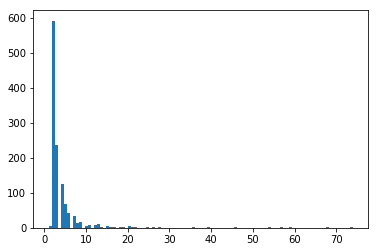

In [146]:
degree = [test_graph_2.degree(i) for i in test_graph_2.nodes()]
pdf, bins, patch = plt.hist(degree, bins=100)

## 5. Visualizing a scale-free graph
Write your graph to file and then load it into Gephi and make it presentable. Save your graph visualization as a PDF and upload it with this Jupyter notebook to Canvas.

In [148]:
nx.write_gml(test_graph,"scale_free.gml")